In [1]:
import pandas as pandas
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

## Load the 'Boston House Pricing Dataset'

In [2]:
from sklearn.datasets import fetch_openml
import pandas as pd

# Load Boston dataset as Bunch object (not a DataFrame yet)
boston = fetch_openml(name="boston", version=1)

# Show feature names
print("Feature Names:\n", boston.feature_names)

# Show dataset description
print("\nDataset Description:\n")
print(boston.DESCR)


Feature Names:
 ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

Dataset Description:

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.
Variables in order:
CRIM     per capita crime rate by town
ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS    proportion of non-retail business acres per town
CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX      nitric oxides concentration (parts per 10 million)
RM       average number of rooms per dwelling
AGE      proportion of owner-occupied units built prior to 1940
DIS      weighted dis

## Preparing The Dataset

In [3]:
dataset = pd.DataFrame(boston.data, columns=boston.feature_names)
dataset.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03


In [4]:
# Output feature is in target column. Need to add target column to dataset as 'Price'
dataset['Price'] = boston.target

dataset.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7


## Basic Functions

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  Price    506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB


In [6]:
# Summarizing the Stats of the Data 
dataset.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000


### Check Missing Value

In [7]:
dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

## EDA (Exploratory Data Analysis)

In [8]:
# Correlation 

dataset.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


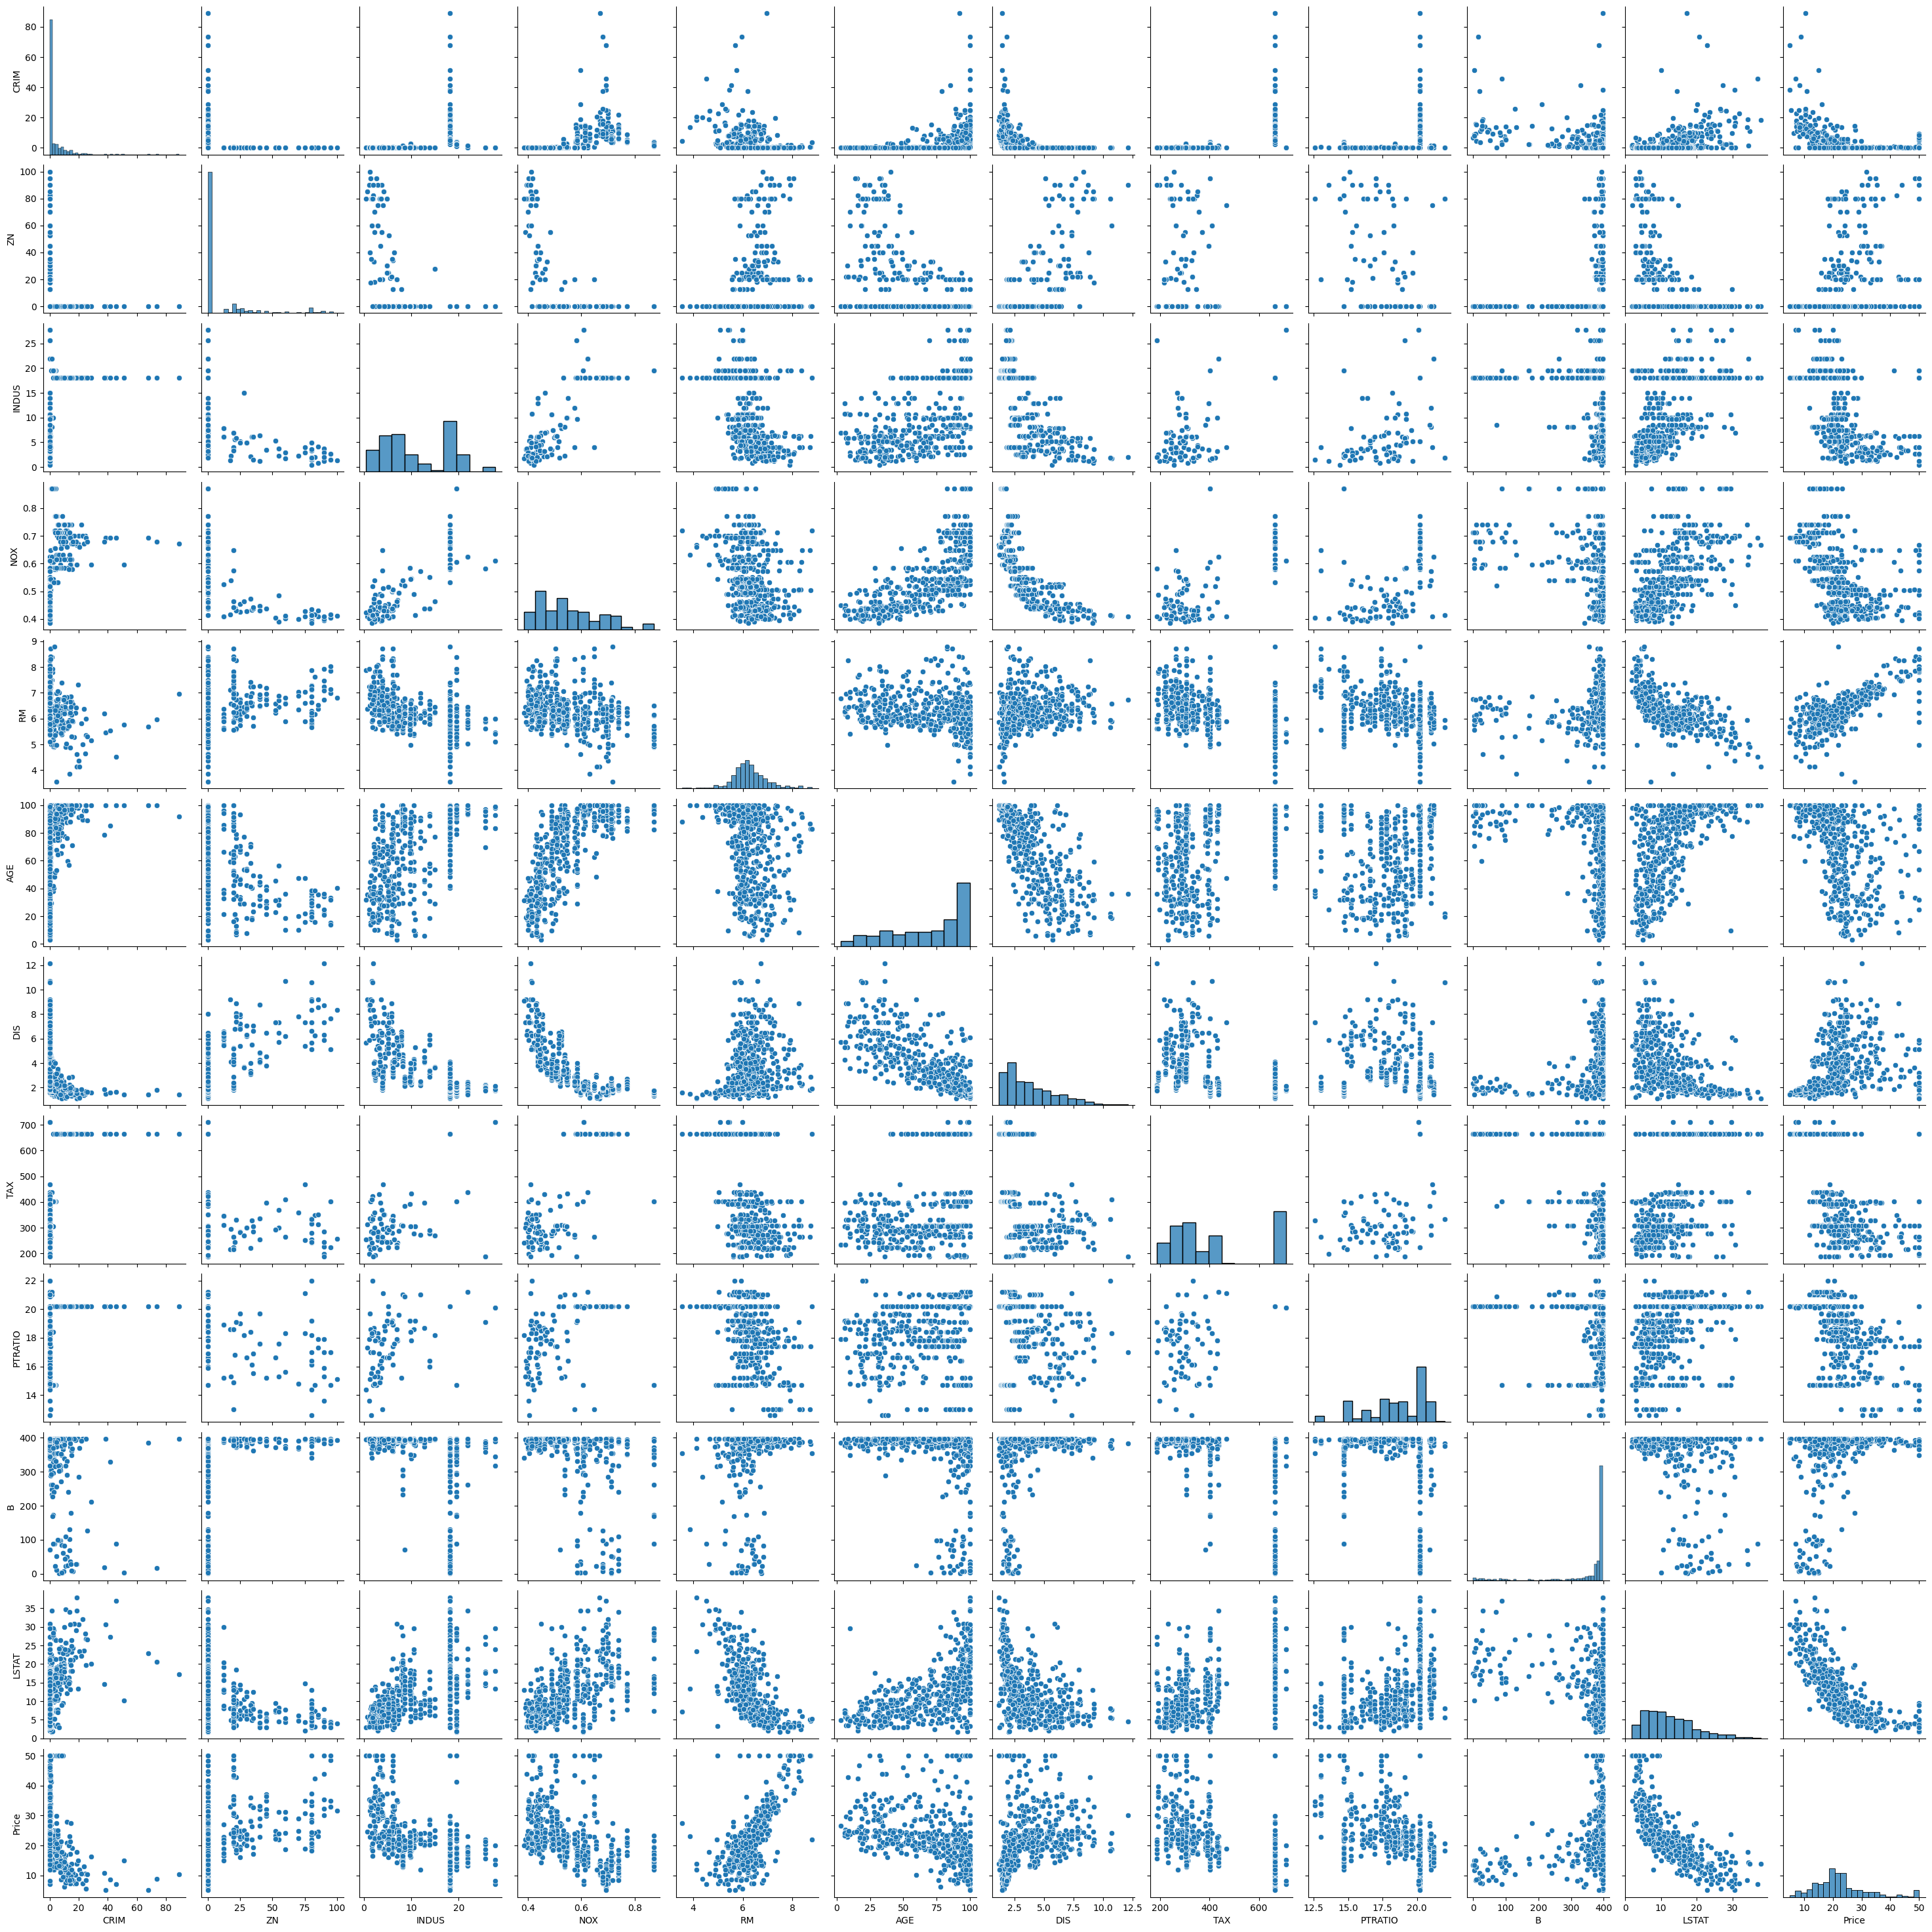

In [9]:
sns.pairplot(dataset)
plt.show()

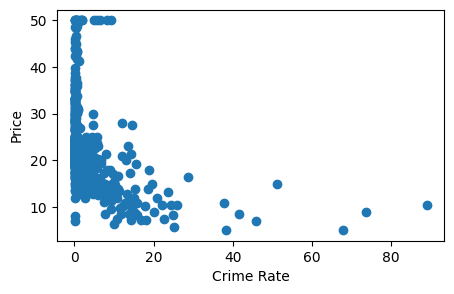

In [10]:
# Scatter plot for Crime Rate and Price
plt.figure(figsize=(5,3))
plt.scatter(dataset['CRIM'], dataset['Price'])
plt.xlabel('Crime Rate')
plt.ylabel('Price')
plt.show()

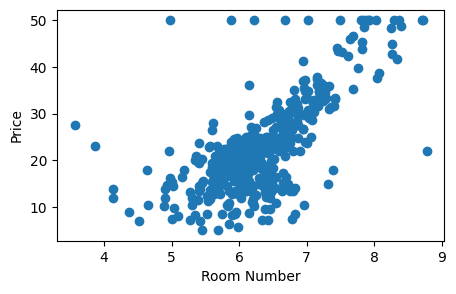

In [11]:
# Scatter plot for Average Number of Rooms(RM) and Price
plt.figure(figsize=(5,3))
plt.scatter(dataset['RM'], dataset['Price'])
plt.xlabel('Room Number')
plt.ylabel('Price')
plt.show()

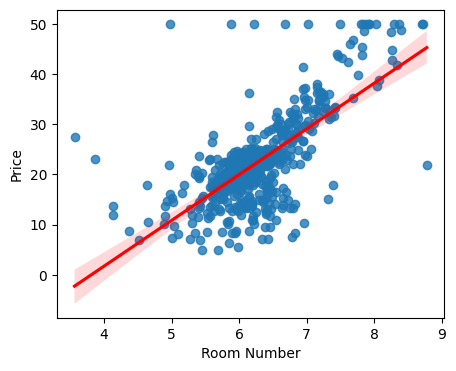

In [12]:
# Regression Plot

plt.figure(figsize=(5,4))
sns.regplot(x='RM', y='Price', data=dataset, line_kws={"color": 'r'})
plt.xlabel('Room Number')
plt.ylabel('Price')
plt.show()           # >> So it is a positive linear relationship

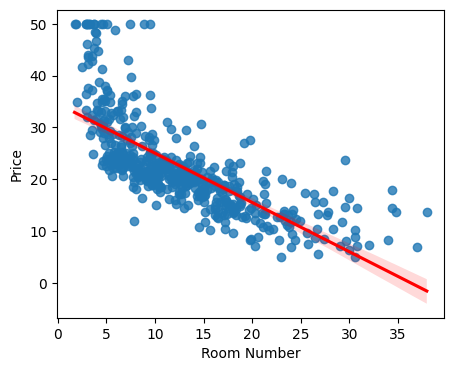

In [13]:
plt.figure(figsize=(5,4))
sns.regplot(x='LSTAT', y='Price', data=dataset, line_kws={'color': 'r'})
plt.xlabel('Room Number')
plt.ylabel('Price')
plt.show()           # >> So it is a negative linear relationship

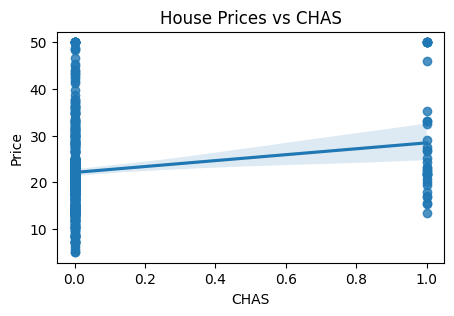

In [14]:
# using it on unrelated stats

dataset['CHAS'] = dataset['CHAS'].astype(int)

plt.figure(figsize=(5,3))
sns.regplot(x='CHAS', y='Price', data=dataset)
plt.title("House Prices vs CHAS")
plt.show()

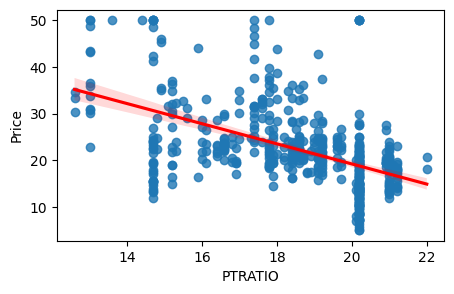

In [15]:

plt.figure(figsize=(5,3))
sns.regplot(x='PTRATIO', y='Price', data=dataset, line_kws={'color':'r'})
plt.show()    
             # >> As PTRATIO increases Price decreases.

## Preparing Independent & Dependent Dataset

'Price' - Dependent feat., rest others - Independent feat.

In [16]:
x = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [17]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [18]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Price, Length: 506, dtype: float64

## Train Test Split

In [19]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [20]:
x_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,15.02340,0.0,18.10,0,0.6140,5.304,97.3,2.1007,24,666.0,20.2,349.48,24.91
15,0.62739,0.0,8.14,0,0.5380,5.834,56.5,4.4986,4,307.0,21.0,395.62,8.47
332,0.03466,35.0,6.06,0,0.4379,6.031,23.3,6.6407,1,304.0,16.9,362.25,7.83
423,7.05042,0.0,18.10,0,0.6140,6.103,85.1,2.0218,24,666.0,20.2,2.52,23.29
19,0.72580,0.0,8.14,0,0.5380,5.727,69.5,3.7965,4,307.0,21.0,390.95,11.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0,0.5200,5.836,91.9,2.2110,5,384.0,20.9,395.67,18.66
270,0.29916,20.0,6.96,0,0.4640,5.856,42.1,4.4290,3,223.0,18.6,388.65,13.00
348,0.01501,80.0,2.01,0,0.4350,6.635,29.7,8.3440,4,280.0,17.0,390.94,5.99
435,11.16040,0.0,18.10,0,0.7400,6.629,94.6,2.1247,24,666.0,20.2,109.85,23.27


In [21]:
x_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
173,0.09178,0.0,4.05,0,0.510,6.416,84.1,2.6463,5,296.0,16.6,395.50,9.04
274,0.05644,40.0,6.41,1,0.447,6.758,32.9,4.0776,4,254.0,17.6,396.90,3.53
491,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711.0,20.1,390.11,18.07
72,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,305.0,19.2,390.91,5.52
452,5.09017,0.0,18.10,0,0.713,6.297,91.8,2.3682,24,666.0,20.2,385.09,17.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,18.81100,0.0,18.10,0,0.597,4.628,100.0,1.5539,24,666.0,20.2,28.79,34.37
436,14.42080,0.0,18.10,0,0.740,6.461,93.3,2.0026,24,666.0,20.2,27.49,18.05
411,14.05070,0.0,18.10,0,0.597,6.657,100.0,1.5275,24,666.0,20.2,35.05,21.22
86,0.05188,0.0,4.49,0,0.449,6.015,45.1,4.4272,3,247.0,18.5,395.99,12.86


## Standardize the dataset

In [27]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

## Q. Why do you Standardize the dataset ?
#### Ans. Internally we use 'Gradient Decent' our main goal is to rech to the 'Global Minima'. To come to the 'Global Minima' we need to make sure that all our independent features are in same unit scale; because of that the convergence will happen quickly.

In [28]:
x_train = scaler.fit_transform(x_train)

In [29]:
x_test = scaler.transform(x_test)  # sepeately doing 'transform' for x_test to make model not know much info about the test dataset.

In [30]:
import pickle

# converts data into a pickle file
pickle.dump(scaler, open('scaling.pkl', 'wb')) # wb = write bytes

## Model Training

In [25]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()

In [26]:
regression.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [27]:
## print the coeficients and the intercept
print('Values of Co-efficients : \n')
print(regression.coef_)

print('\n\nVallue of the intercept :\n')
print(regression.intercept_)

Values of Co-efficients : 

[-1.00213533  0.69626862  0.27806485  0.7187384  -2.0223194   3.14523956
 -0.17604788 -3.0819076   2.25140666 -1.76701378 -2.03775151  1.12956831
 -3.61165842]


Vallue of the intercept :

22.796534653465343


In [28]:
## On which porameters this model has been trained :
regression.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'positive': False,
 'tol': 1e-06}

### Prediction with test Data

In [29]:
reg_pred = regression.predict(x_test)
reg_pred

array([28.99672362, 36.02556534, 14.81694405, 25.03197915, 18.76987992,
       23.25442929, 17.66253818, 14.34119   , 23.01320703, 20.63245597,
       24.90850512, 18.63883645, -6.08842184, 21.75834668, 19.23922576,
       26.19319733, 20.64773313,  5.79472718, 40.50033966, 17.61289074,
       27.24909479, 30.06625441, 11.34179277, 24.16077616, 17.86058499,
       15.83609765, 22.78148106, 14.57704449, 22.43626052, 19.19631835,
       22.43383455, 25.21979081, 25.93909562, 17.70162434, 16.76911711,
       16.95125411, 31.23340153, 20.13246729, 23.76579011, 24.6322925 ,
       13.94204955, 32.25576301, 42.67251161, 17.32745046, 27.27618614,
       16.99310991, 14.07009109, 25.90341861, 20.29485982, 29.95339638,
       21.28860173, 34.34451856, 16.04739105, 26.22562412, 39.53939798,
       22.57950697, 18.84531367, 32.72531661, 25.0673037 , 12.88628956,
       22.68221908, 30.48287757, 31.52626806, 15.90148607, 20.22094826,
       16.71089812, 20.52384893, 25.96356264, 30.61607978, 11.59

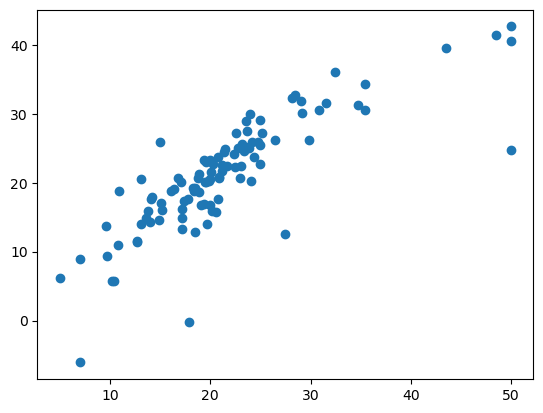

In [30]:
## Scatter plot for Prediction -> it'll show how close x_test results and y_test data are
plt.scatter(y_test,reg_pred)
plt.show()

In [31]:
## Residuals
residuals = y_test - reg_pred

residuals

173    -5.396724
274    -3.625565
491    -1.216944
72     -2.231979
452    -2.669880
         ...    
412    18.064237
436    -4.084867
411     1.016403
86      0.223780
75     -3.079024
Name: Price, Length: 102, dtype: float64

<Figure size 400x300 with 0 Axes>

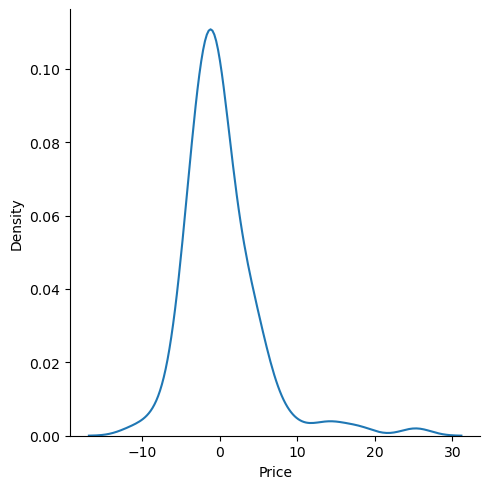

In [32]:
## Plot this residuals
plt.figure(figsize=(4,3))
sns.displot(residuals, kind='kde')
plt.show()

From 20-30 there lies some **outlierrs** as the graph is wavy there. Same we get from the prev Scatter plot as few points are far alligned of the line than rest of the gathering

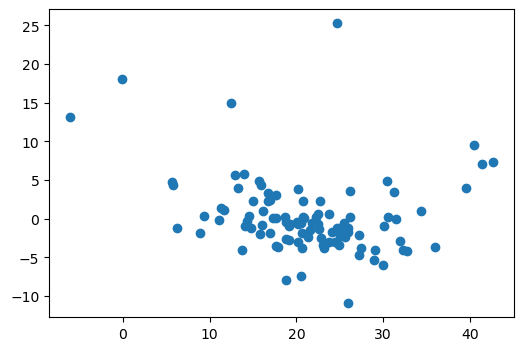

In [33]:
## Scatter plot with respect to prediction and residuals
plt.figure(figsize=(6,4))
plt.scatter(reg_pred, residuals)
plt.show()       # >> Uniform distribution

**Uniformly** Scattered not following any linearity

## Checking Performance

## MSE, MAE, RMSE

In [34]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print('Mean Absolute Error :')
print(mean_absolute_error(y_test, reg_pred))

print('\nMean Squarred Error :')
print(mean_squared_error(y_test, reg_pred))

# Root Mean Square Error :
print('\n\nRootMean Squarred Error :')
print(np.sqrt(mean_squared_error(y_test, reg_pred)))

Mean Absolute Error :
3.1890919658878483

Mean Squarred Error :
24.291119474973527


RootMean Squarred Error :
4.928602182665338


## R square & Adjusted R square

Formula

#### R^2 = 1 - SSR/SST
R^2 = coefficient of determination SSR = sum of squares of residuals SST = total sum of squares

In [35]:
from sklearn.metrics import r2_score

score = r2_score(y_test, reg_pred)
print(score)

0.6687594935356318


#### Adjusted R2 = 1 - [(1-R2)*(n-1)/(n-k-1)]
where:
<br><br>
R2: The R2 of the model n: The number of observtions k: The number of predictor variables

In [37]:
# no such library for adjusted R2.. so directly implement it
1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.6198262368988501

##  New  Data Prediction

In [48]:
boston.data.iloc[0]

CRIM       0.00632
ZN            18.0
INDUS         2.31
CHAS             0
NOX          0.538
RM           6.575
AGE           65.2
DIS           4.09
RAD              1
TAX          296.0
PTRATIO       15.3
B            396.9
LSTAT         4.98
Name: 0, dtype: object

In [56]:
boston.data.iloc[0].shape

(13,)

In [59]:
# Take the first row, convert to numpy, reshape
sample = boston.data.iloc[0].to_numpy().reshape(1, -1)

In [58]:
# Transformatin of new data
scaler.transform(sample)

C:\Users\Ankit\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.4064505 ,  0.27809835, -1.25979517, -0.27808871, -0.15723342,
         0.365677  , -0.1200431 ,  0.13239061, -0.97404758, -0.65092617,
        -1.35597347,  0.44418004, -1.05291444]])

In [61]:
prediction = regression.predict(scaler.transform(sample))

print("Prediction for first row:", prediction)


Prediction for first row: [29.95339638]


C:\Users\Ankit\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


#
## Pickling  the Model file for Deployment

In [62]:
import pickle

In [63]:
pickle.dump(regression, open('regmodel.pkl','wb'))
# 'regmodel.pkl' → file name where the model will be saved.
# 'wb' → write binary mode, because pickle stores objects as bytes, not plain text.

In [64]:
pickled_model = pickle.load(open('regmodel.pkl', 'rb'))  # 'rb' → read binary

In [66]:
# Prediction
pickled_model.predict(scaler.transform(sample))

C:\Users\Ankit\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([29.95339638])